# Estadisticos Básicos Pandas

## Variables Categóricas

In [1]:
import pandas as pd
df = pd.read_excel('/Users/jimenacambronero/Desktop/Proyectos para Portfolio/PythonPracticas/Datos/Frutos_Secos_unicos.xlsx')

In [2]:
# Conteo de frecuencias
df['Tipo Producto'].value_counts()

Cacahuetes    100
Almendras      69
Pistachos      66
Nueces         65
Name: Tipo Producto, dtype: int64

In [3]:
# En porcentaje
df['Tipo Producto'].value_counts(normalize=True)*100

Cacahuetes    33.333333
Almendras     23.000000
Pistachos     22.000000
Nueces        21.666667
Name: Tipo Producto, dtype: float64

In [4]:
# Moda (Valor más frecuente)
df['Nombre Cliente'].mode()

0    Mercadona
Name: Nombre Cliente, dtype: object

In [5]:
#Moda (Valor más Frecuente)
df['Tipo Producto'].mode()

0    Cacahuetes
Name: Tipo Producto, dtype: object

## Variables Continuas

In [6]:
# Media
df['Precio (€/kg)'].mean()

5.598333333333333

In [7]:
# Mediana
df['Precio (€/kg)'].median()

5.475

In [8]:
# Máximo
df['Precio (€/kg)'].max()

11.57

In [9]:
# Mínimo
df['Precio (€/kg)'].min()

0.97

In [10]:
# Localizar el Indice del valor máximo
df['Precio (€/kg)'].idxmax()

12

In [12]:
df.iloc[12]

Nombre Cliente                 Aldi
Tipo Producto            Cacahuetes
Precio (€/kg)                 11.57
Cantidad Vendida (kg)          1650
Fecha Venta                 8/12/23
Provincia Cliente           Sevilla
id                           389944
Completado                       Si
Name: 12, dtype: object

In [11]:
# Localizar el Indice del valor mínimo
df['Precio (€/kg)'].idxmin()

206

In [13]:
df.iloc[206]

Nombre Cliente           Mas y Mas
Tipo Producto            Pistachos
Precio (€/kg)                 0.97
Cantidad Vendida (kg)          316
Fecha Venta                26/1/23
Provincia Cliente            Cádiz
id                          390138
Completado                      Si
Name: 206, dtype: object

## Correlación

## Variables Continuas

Una variables continua es una caraceristica que puede tomar cualquier valor dentro de un rango específico. No se limita a valores discretos y puede tener infinitos valores posibles. Por ejemplo, la altura de las personas es una variable continua, ya que puede ser cualquier valor en el rango entre la estatura más corta y la más alta

In [14]:
df_numericos = df.select_dtypes(include=['float64','int64'])

In [15]:
# Correlación 
df_numericos.corr()

,Precio (€/kg),Cantidad Vendida (kg),id
Precio (€/kg),1.000000,-0.114999,-0.059525
Cantidad Vendida (kg),-0.114999,1.000000,-0.080907
id,-0.059525,-0.080907,1.000000


In [16]:
df_numericos.corr(method='pearson') #método por defecto

,Precio (€/kg),Cantidad Vendida (kg),id
Precio (€/kg),1.000000,-0.114999,-0.059525
Cantidad Vendida (kg),-0.114999,1.000000,-0.080907
id,-0.059525,-0.080907,1.000000


In [18]:
# Ver la correlación solo entre dos variables
df_numericos['Precio (€/kg)'].corr(df_numericos['Cantidad Vendida (kg)'])

-0.11499876970258154

In [21]:
df_corre = pd.read_excel('/Users/jimenacambronero/Desktop/Proyectos para Portfolio/PythonPracticas/Datos/datos_correlacionados.xlsx')

df_corre.head()

,Año,Beneficios,Valor en Bolsa
0,1,109.934283,92.923789
1,2,97.234714,106.034024
2,3,112.953771,101.523421
3,4,130.460597,106.837428
4,5,95.316933,94.010688


In [ ]:
df_corre['Beneficios'].corr([df_corre['Valor en Bolsa']])

<function matplotlib.pyplot.show(close=None, block=None)>

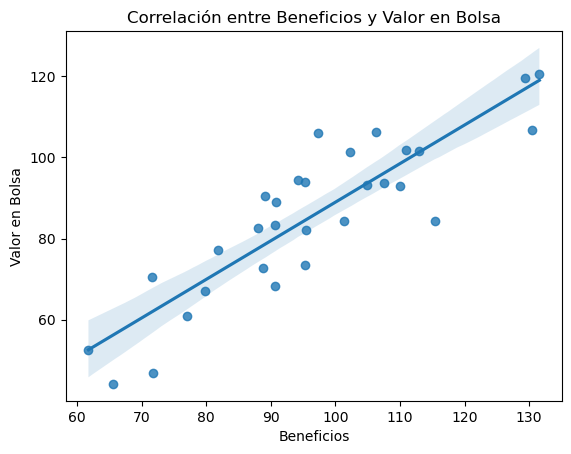

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de dispersión con una linea de regresión
sns.regplot(x='Beneficios', y='Valor en Bolsa', data=df_corre)
plt.title('Correlación entre Beneficios y Valor en Bolsa')
plt.xlabel('Beneficios')
plt.ylabel('Valor en Bolsa')
plt.show

Correlación postiva. A mayor Valor en Bolsa mayor Beneficio. 

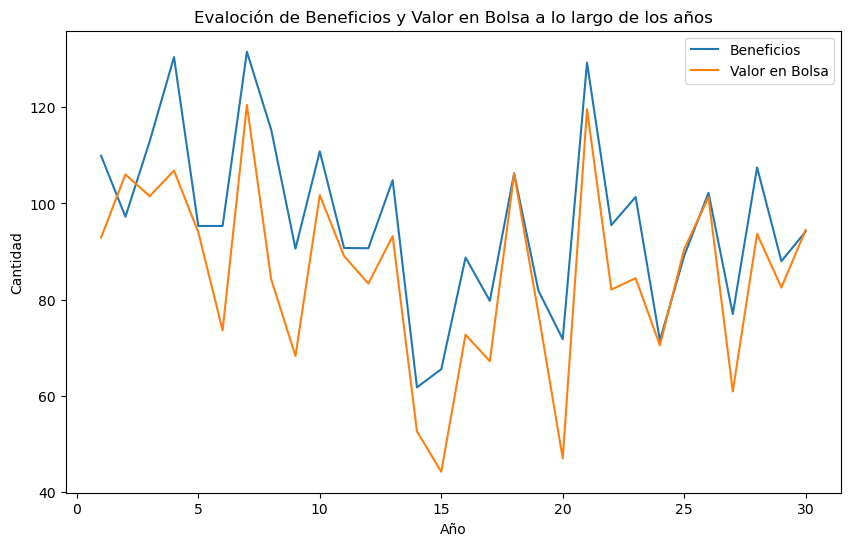

In [23]:
# Gráfico de lineas
plt.figure(figsize=(10,6))
plt.plot(df_corre['Año'], df_corre['Beneficios'], label= 'Beneficios')
plt.plot(df_corre['Año'], df_corre['Valor en Bolsa'], label='Valor en Bolsa')

# Etiquetas y leyenda
plt.title('Evaloción de Beneficios y Valor en Bolsa a lo largo de los años')
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.legend()

plt.show()

### Ordinales

Si las caracteristicas que estamos comparando no son números que pueden tomar cualquier valor( como la edad o la temperatura), sino que tienen un orden (como la clasificacion de productos de peor a mejor), entonces usas métodos como la tau e Kendall o la Rho de Spearman.

In [24]:
import scipy

In [25]:
df_numericos.corr(method='kendall')

,Precio (€/kg),Cantidad Vendida (kg),id
Precio (€/kg),1.000000,-0.073944,-0.036675
Cantidad Vendida (kg),-0.073944,1.000000,-0.055171
id,-0.036675,-0.055171,1.000000


In [26]:
df_numericos.corr(method='spearman') # no sigue una correlacion lineal (ejemplo edad - compra de tecnología)

,Precio (€/kg),Cantidad Vendida (kg),id
Precio (€/kg),1.000000,-0.109109,-0.057322
Cantidad Vendida (kg),-0.109109,1.000000,-0.080302
id,-0.057322,-0.080302,1.000000


In [27]:
df_numericos['Precio (€/kg)'].corr(df_numericos['Cantidad Vendida (kg)'], method='kendall')

-0.07394350955380263

## Seleccionar Variables según su Tipología

In [30]:
df=pd.read_excel('/Users/jimenacambronero/Desktop/Proyectos para Portfolio/PythonPracticas/Datos/Frutos_Secos_unicos.xlsx')

In [31]:
df.head(3)

,Nombre Cliente,Tipo Producto,Precio (€/kg),Cantidad Vendida (kg),Fecha Venta,Provincia Cliente,id,Completado
0,Mas y Mas,Almendras,4.54,1212,29/3/23,Cádiz,389932,Si
1,Mercadona,Nueces,5.84,591,5/12/23,Sevilla,389933,Si
2,Alcampo,Cacahuetes,2.69,2831,26/7/23,Madrid,389934,Si


In [32]:
df.select_dtypes('number')

,Precio (€/kg),Cantidad Vendida (kg),id
0,4.54,1212,389932
1,5.84,591,389933
2,2.69,2831,389934
3,6.70,516,389935
4,6.14,1283,389936
...,...,...,...
295,9.75,2367,390227
296,3.82,1951,390228
297,5.22,2811,390229
298,8.07,473,390230


In [33]:
df.select_dtypes('number').mean()

Precio (€/kg)                 5.598333
Cantidad Vendida (kg)      1616.950000
id                       390081.500000
dtype: float64